In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.fillna(data.mean(), inplace=True)
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13


In [3]:
data['OIP'] = data['porosity'] * data['oil saturation']
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,OIP
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.044089
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026464
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.044125
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026486
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026496


In [4]:
predictors = data[['easting', 'northing']]

In [39]:
def model_porosity():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['porosity'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Porosity Score', model.score(test_x, test_y))
    
    return model

In [40]:
def model_permeability():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['permeability'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Permeability Score', model.score(test_x, test_y))
    
    return model

In [46]:
def model_youngs():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['Young\'s Modulus'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Young\'s Modulus Score', model.score(test_x, test_y))
    
    return model

In [50]:
def model_oil():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['oil saturation'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Oil saturation Score', model.score(test_x, test_y))
    
    return model

In [ ]:
def model_poissons():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['Poisson\'s ratio'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Poisson\'s Ratio Score', model.score(test_x, test_y))
    
    return model

In [72]:
def model_oip():
    oip_features = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation']]
    train_x, test_x, train_y, test_y = train_test_split(oip_features, data['OIP'], test_size=0.8, random_state=0)
    model = LinearRegression()
    model.fit(train_x, train_y)
    
    print('OIP Score', model.score(test_x, test_y))
    print('Coefficients', model.coef_)
    
    return model

In [41]:
def predict_and_plot(model, feature, precision=500):
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    print(x.shape, y.shape)
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            input_array.append((x[i], y[j]))

    predictions = model.predict(input_array)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [73]:
porosity_model = model_porosity()
permeability_model = model_permeability()
poissons_model = model_poissons()
youngs_model = model_youngs()
oil_model = model_oil()
oip_model = model_oip()

Porosity Score 0.7084037855222055
Permeability Score 0.6573818211052115
Poisson's Ratio Score 0.9444329486226865
Young's Modulus Score 0.9492213668983229
Oil saturation Score 0.9645101014983478
OIP Score 0.9942685761848505
Coefficients [ 8.39892056e-01  3.63918463e-03  3.34319284e-02 -7.83785146e-12
  5.30103283e-02]


(500,) (500,)


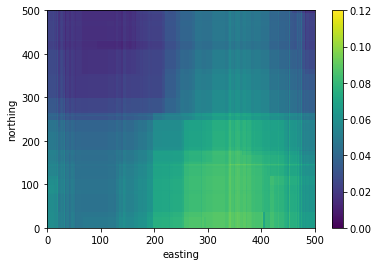

In [33]:
predict_and_plot(porosity_model, 'porosity')

(500,) (500,)


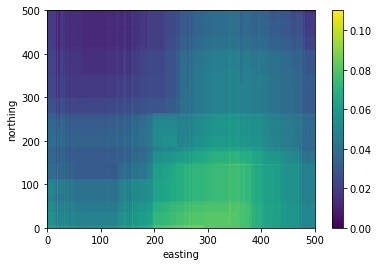

In [34]:
predict_and_plot(oip_model, 'OIP')

(500,) (500,)


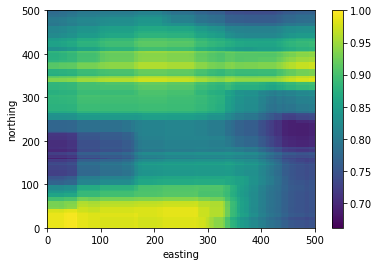

In [52]:
predict_and_plot(oil_model, 'oil saturation')